# Regression and Other Stories: Heights and weights

Height and weight distributions of women and men illustrating central limit theorem and normal distribution. See Chapter 3 in Regression and Other Stories.

----

### Load packages

In [1]:
using StatsPlots, Distributions, KernelDensity

### Summary data of height and weight distributions of women and men

In [2]:
height_counts_women = [80,107,296,695,1612,2680,4645,8201,9948,11733,10270,9942,6181,3990,2131,1154,245,257,0,0,0,0]*10339/74167
weight_counts_women = [362,1677,4572,9363,11420,12328,9435,7023,5047,3621,2753,2081,1232,887,2366]*10339/74167
height_counts_men = [0,0,0,0,0,0,0,542,668,1221,2175,4213,5535,7980,9566,9578,8867,6716,5019,2745,1464,1263]*9983/67552;

### Height distribution for all adults

In [3]:
height_counts = height_counts_men + height_counts_women;

### Tick labels for heights in inches


In [4]:
height_hist_names = ["","55","","","","","60","","","","","65","","","","","70","","","","","75"];

### Bar plots

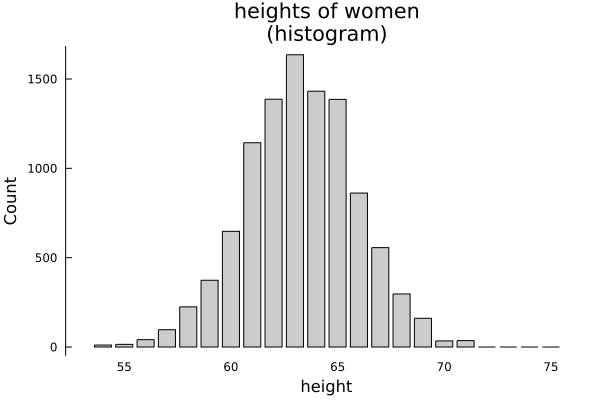

In [5]:
bar(
    height_counts_women,
    legend=false,
    color=:grey80,
    title="heights of women\n(histogram)",
    xlab="height",
    ylab="Count",
    xticks=(1:22,height_hist_names),
    xaxis=false,
    grid=false
)

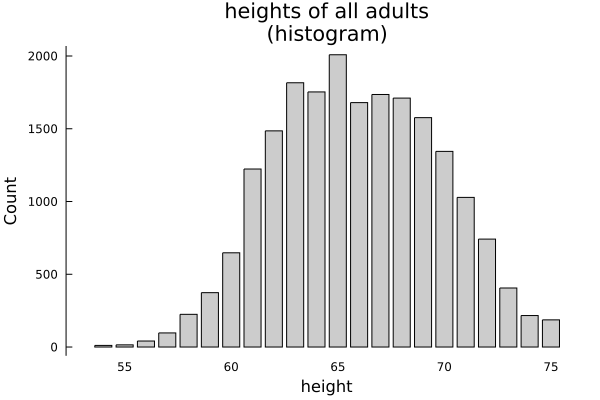

In [6]:
bar(
    height_counts,
    legend=false,
    color=:grey80,
    title="heights of all adults\n(histogram)",
    xlab="height",
    ylab="Count",
    xticks=(1:22,height_hist_names),
    xaxis=false, grid=false
)

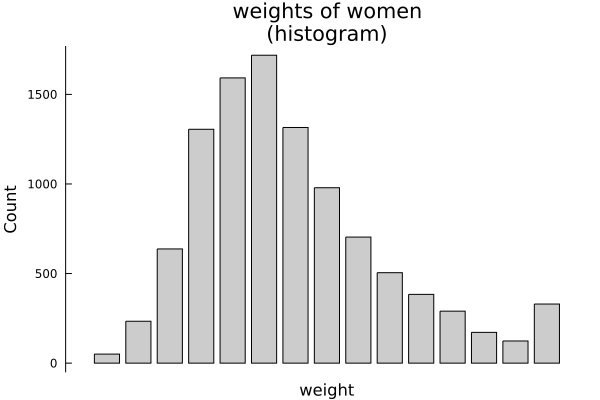

In [7]:
bar(
    weight_counts_women,
    legend=false,
    color=:grey80,
    title="weights of women\n(histogram)",
    xlab="weight",
    ylab="Count",
    xticks=false,
    xaxis=false, grid=false
)

### Normal distribution for heights of women

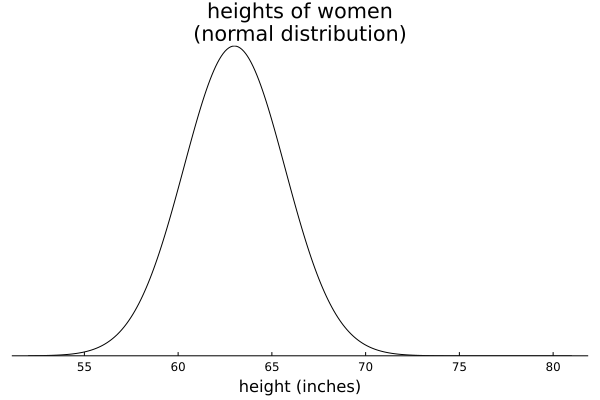

In [8]:
plot(
    52:0.1:81,
    Normal(63,2.7),
    legend=false, grid=false, yaxis=false, yticks=false,
    xlabel="height (inches)",
    title="heights of women\n(normal distribution)",
    ylim=(0,Inf),
    color=:black
)

### Normal distribution for heights of men

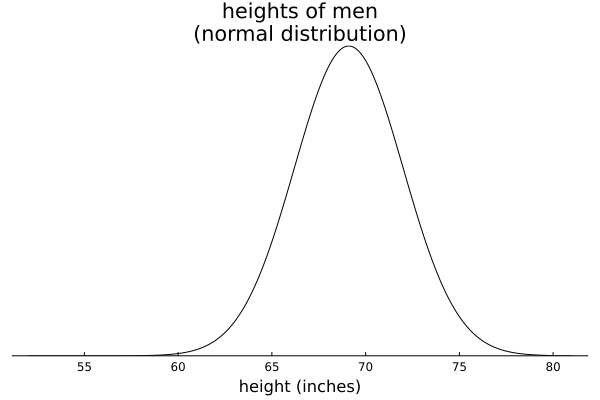

In [9]:
plot(
    52:0.1:81,
    Normal(69.1,2.9),
    legend=false, grid=false, yaxis=false, yticks=false,
    xlabel="height (inches)",
    title="heights of men\n(normal distribution)",
    ylim=(0,Inf),
    color=:black
)

### Mixture of normals distribution for heights of all adults

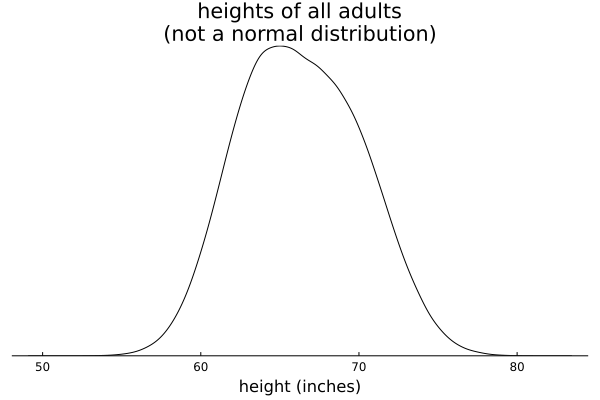

In [10]:
d = rand(
    MixtureModel(
        [Normal(63.7,2.7), Normal(69.1,2.9)],
        [0.52,0.48]
        ),
    1_000_000
)

plot(
    kde(d, bandwidth=0.4),
    legend=false, grid=false, yaxis=false, yticks=false,
    xlabel="height (inches)",
    title="heights of all adults\n(not a normal distribution)",
    ylim=(0,Inf),
    color=:black
)

### Normal distribution for log weights of men

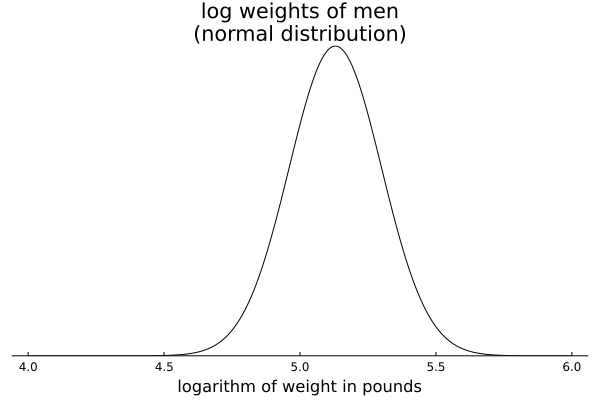

In [11]:
plot(
    4:0.01:6,
    Normal(5.13,.17),
    legend=false, grid=false, yaxis=false, yticks=false,
    xlabel="logarithm of weight in pounds",
    title="log weights of men\n(normal distribution)",
    ylim=(0,Inf),
    color=:black
)

### Log-normal distribution for weights of men

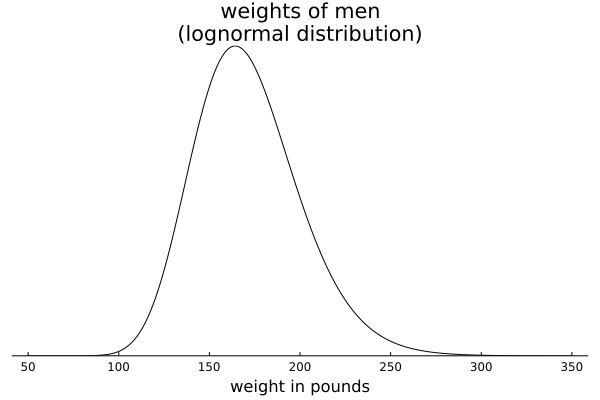

In [12]:
plot(
    50:0.5:350,
    LogNormal(5.13,.17),
    legend=false, grid=false, yaxis=false, yticks=false,
    xlabel="weight in pounds",
    title="weights of men\n(lognormal distribution)",
    ylim=(0,Inf),
    color=:black
)

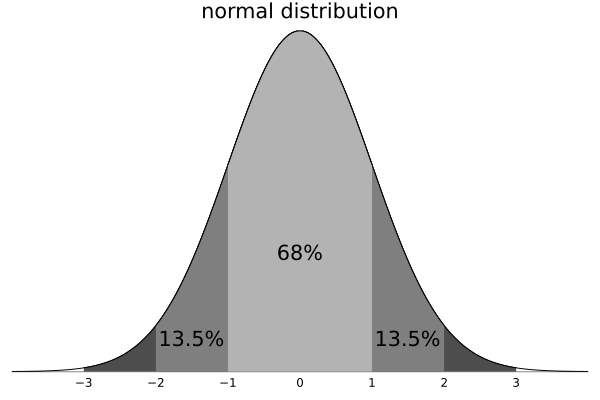

In [13]:
kwargs=Dict(
    :color=>:black,
    :grid=>false,
    :yaxis=>false,
    :yticks=>false,
    :legend=>false,
    :ylim=>(0,Inf),
    :xlims=>(-4,4),
    :title=>"normal distribution",
    :xticks=>-3:1:3
)
plot(-4:0.01:4, Normal(),fill=(0,:white);kwargs...)
plot!(-3:0.01:3,Normal(),fill=(0,:gray30);kwargs...)
plot!(-2:0.01:2,Normal(),color=:black,fill=(0,:gray50);kwargs...)
plot!(-1:0.01:1,Normal(),color=:black,fill=(0,:gray70);kwargs...)
annotate!(0, 0.35*pdf(Normal(),0), "68%")
annotate!(-1.5, 0.3*pdf(Normal(),1.5), "13.5%")
annotate!(1.5, 0.3*pdf(Normal(),1.5), "13.5%")